In [182]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [183]:
titanic=pd.read_csv('titanic_train.csv')

In [184]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [185]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
titanic.shape

(891, 12)

In [187]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Engineering

In [188]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [189]:
titanic=titanic.drop(columns='Cabin',axis=1)

In [190]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [191]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [192]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [193]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [194]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [195]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [196]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [197]:
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


In [198]:
X=titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)

In [199]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [200]:
Y=titanic['Survived']

In [201]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Data Visualization

# Correlation

<Figure size 800x700 with 0 Axes>

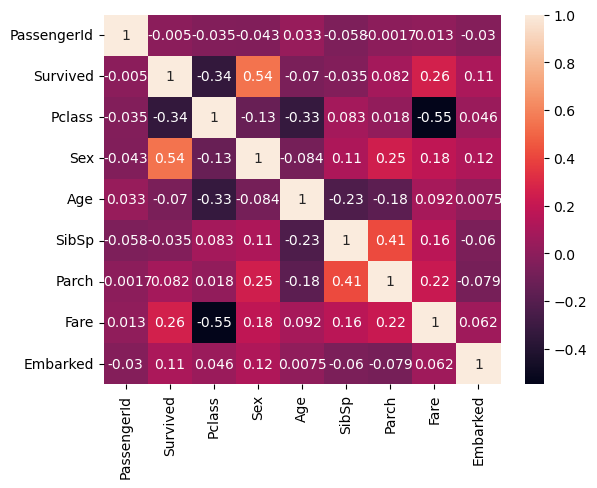

<Figure size 800x700 with 0 Axes>

In [202]:
corr_hmap = titanic.corr()
sns.heatmap(corr_hmap,annot=True)
plt.figure(figsize=(8,7))

In [203]:
#shows positive correlation between sibso and parch but negative correlation between age and sibsp

# Count plot

<function matplotlib.pyplot.show(close=None, block=None)>

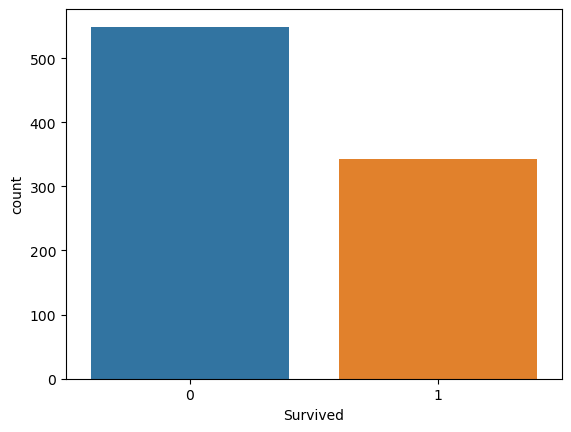

In [204]:
# shows the number of survived people is less than not survived
sns.countplot(x ='Survived', data = titanic)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

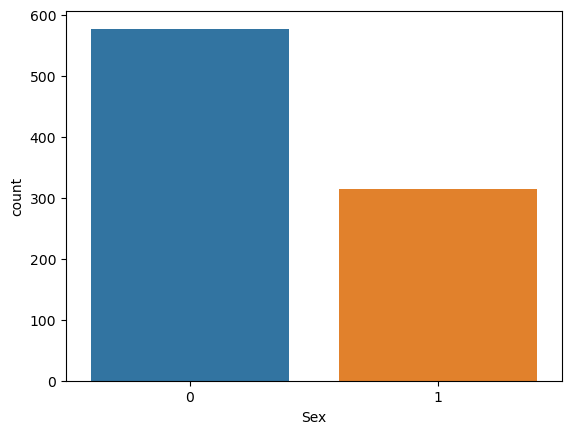

In [103]:
# shows more male passengers have survived
sns.countplot(x ='Sex', data = titanic)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

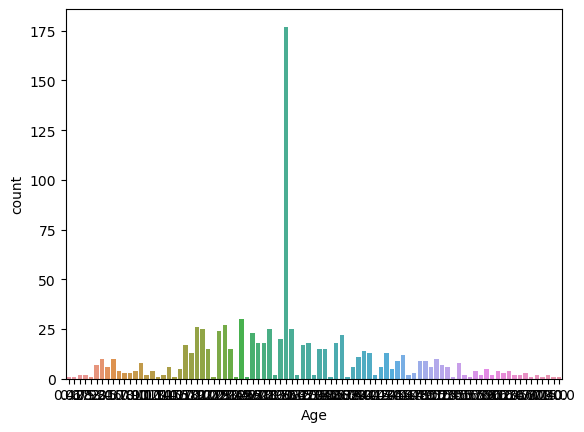

In [104]:
sns.countplot(x ='Age', data = titanic)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

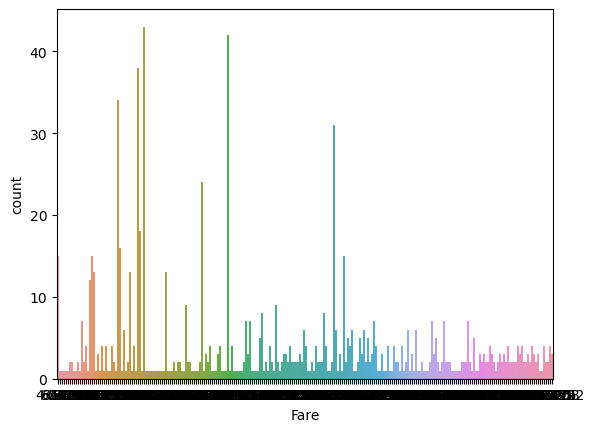

In [105]:
sns.countplot(x ='Fare', data = titanic)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

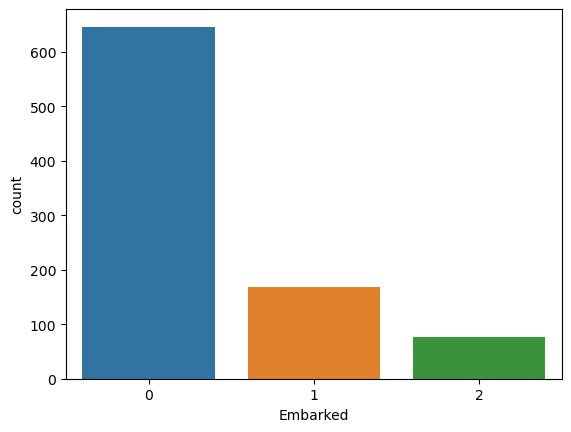

In [106]:
sns.countplot(x ='Embarked', data = titanic)
plt.show

# Distplot

<function matplotlib.pyplot.show(close=None, block=None)>

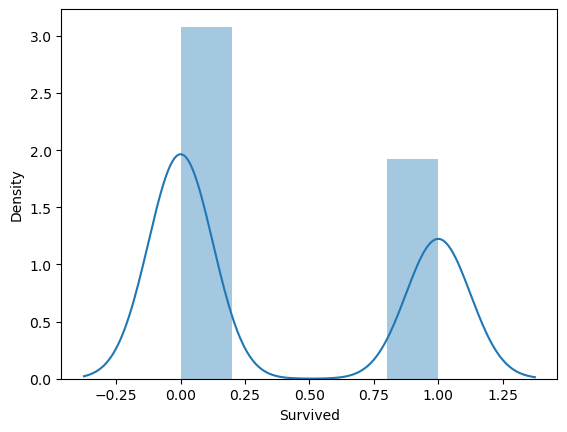

In [108]:
sns.distplot(titanic['Survived'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

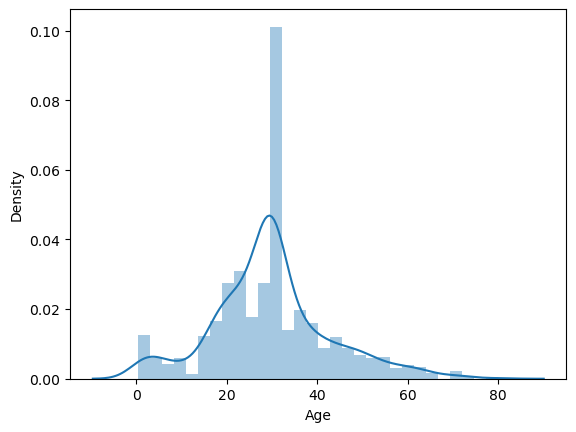

In [109]:
sns.distplot(titanic['Age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

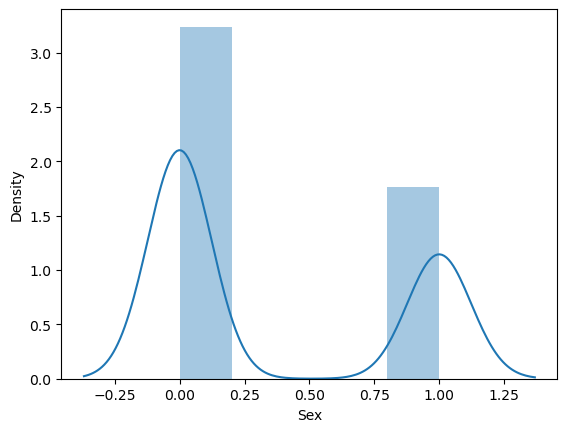

In [110]:
sns.distplot(titanic['Sex'])
plt.show

# Bar Plot

<Axes: xlabel='Survived', ylabel='Age'>

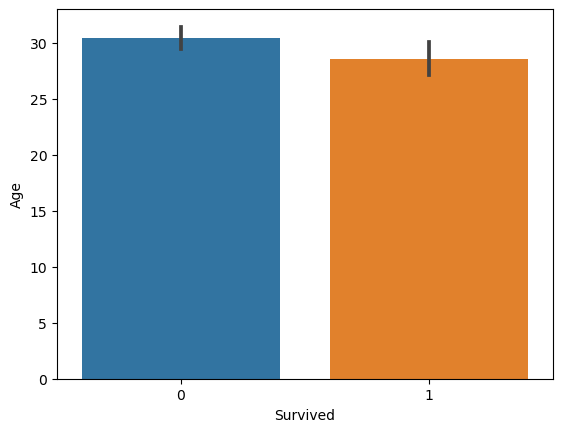

In [112]:
# shows the relation between age and survived passengers
sns.barplot(x='Survived',y='Age',data=titanic)

<Axes: xlabel='Survived', ylabel='Embarked'>

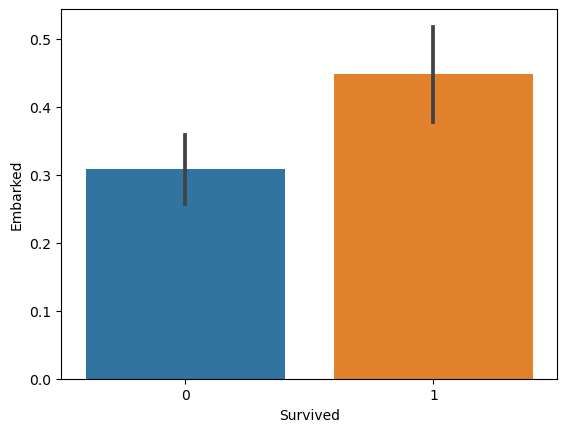

In [114]:
sns.barplot(x='Survived',y='Embarked',data=titanic)

# Violin Plot

<Axes: xlabel='Survived', ylabel='Age'>

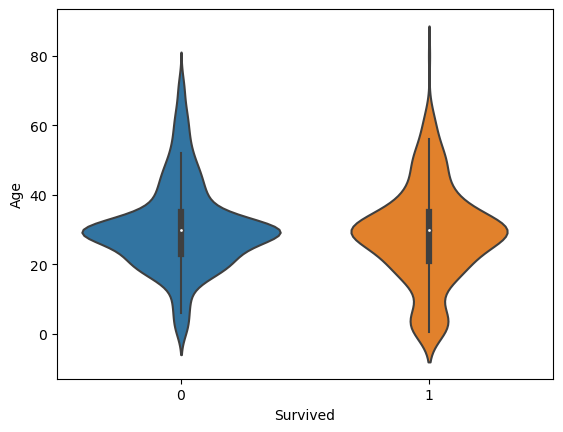

In [116]:
sns.violinplot(x='Survived',y='Age',data=titanic)

<Axes: xlabel='Survived', ylabel='Sex'>

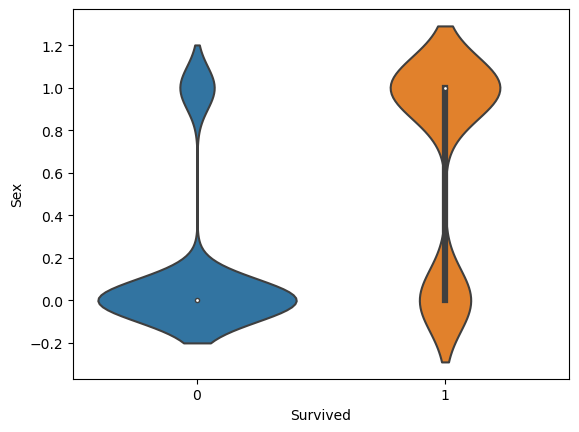

In [117]:
sns.violinplot(x='Survived',y='Sex',data=titanic)

<Axes: xlabel='Survived', ylabel='Pclass'>

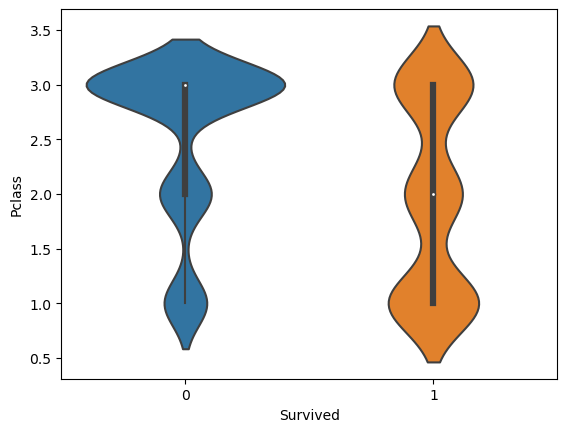

In [118]:
sns.violinplot(x='Survived',y='Pclass',data=titanic)

<Axes: xlabel='Survived', ylabel='Fare'>

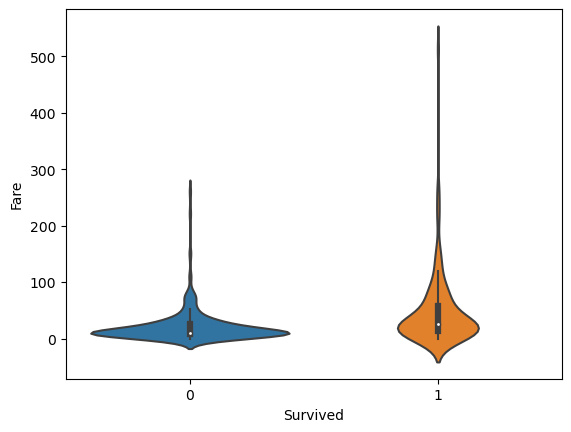

In [119]:
sns.violinplot(x='Survived',y='Fare',data=titanic)

In [121]:
titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.543397
dtype: float64

# Box Plot

PassengerId       Axes(0.125,0.747241;0.133621x0.132759)
Survived       Axes(0.285345,0.747241;0.133621x0.132759)
Pclass          Axes(0.44569,0.747241;0.133621x0.132759)
Sex            Axes(0.606034,0.747241;0.133621x0.132759)
Age            Axes(0.766379,0.747241;0.133621x0.132759)
SibSp             Axes(0.125,0.587931;0.133621x0.132759)
Parch          Axes(0.285345,0.587931;0.133621x0.132759)
Fare            Axes(0.44569,0.587931;0.133621x0.132759)
Embarked       Axes(0.606034,0.587931;0.133621x0.132759)
dtype: object

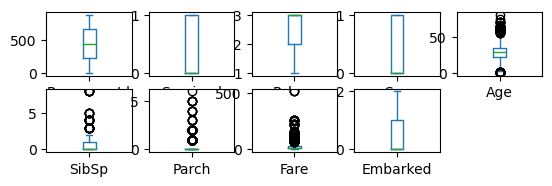

In [125]:
titanic.plot(kind='box',subplots=True,layout=(5,5))

# Histogram

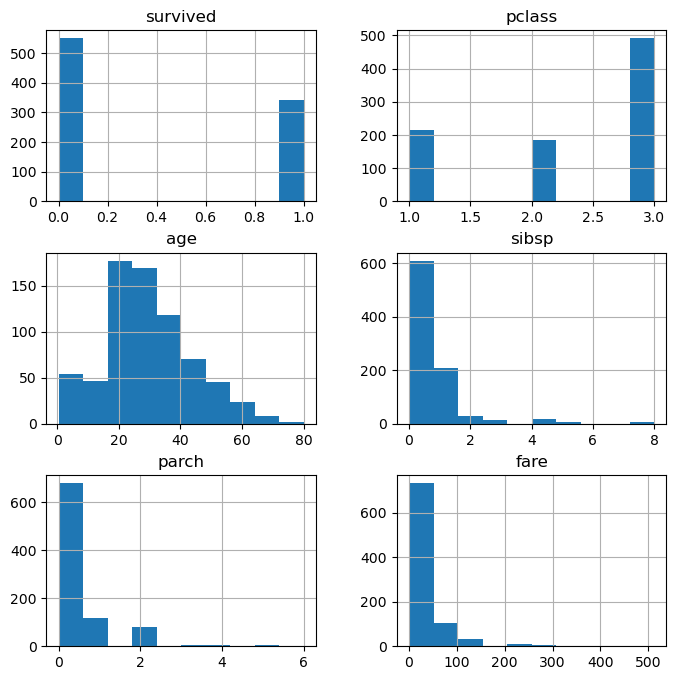

In [156]:
titanic.hist(figsize=(8,8),bins=10)
plt.show()

# Pair Plot

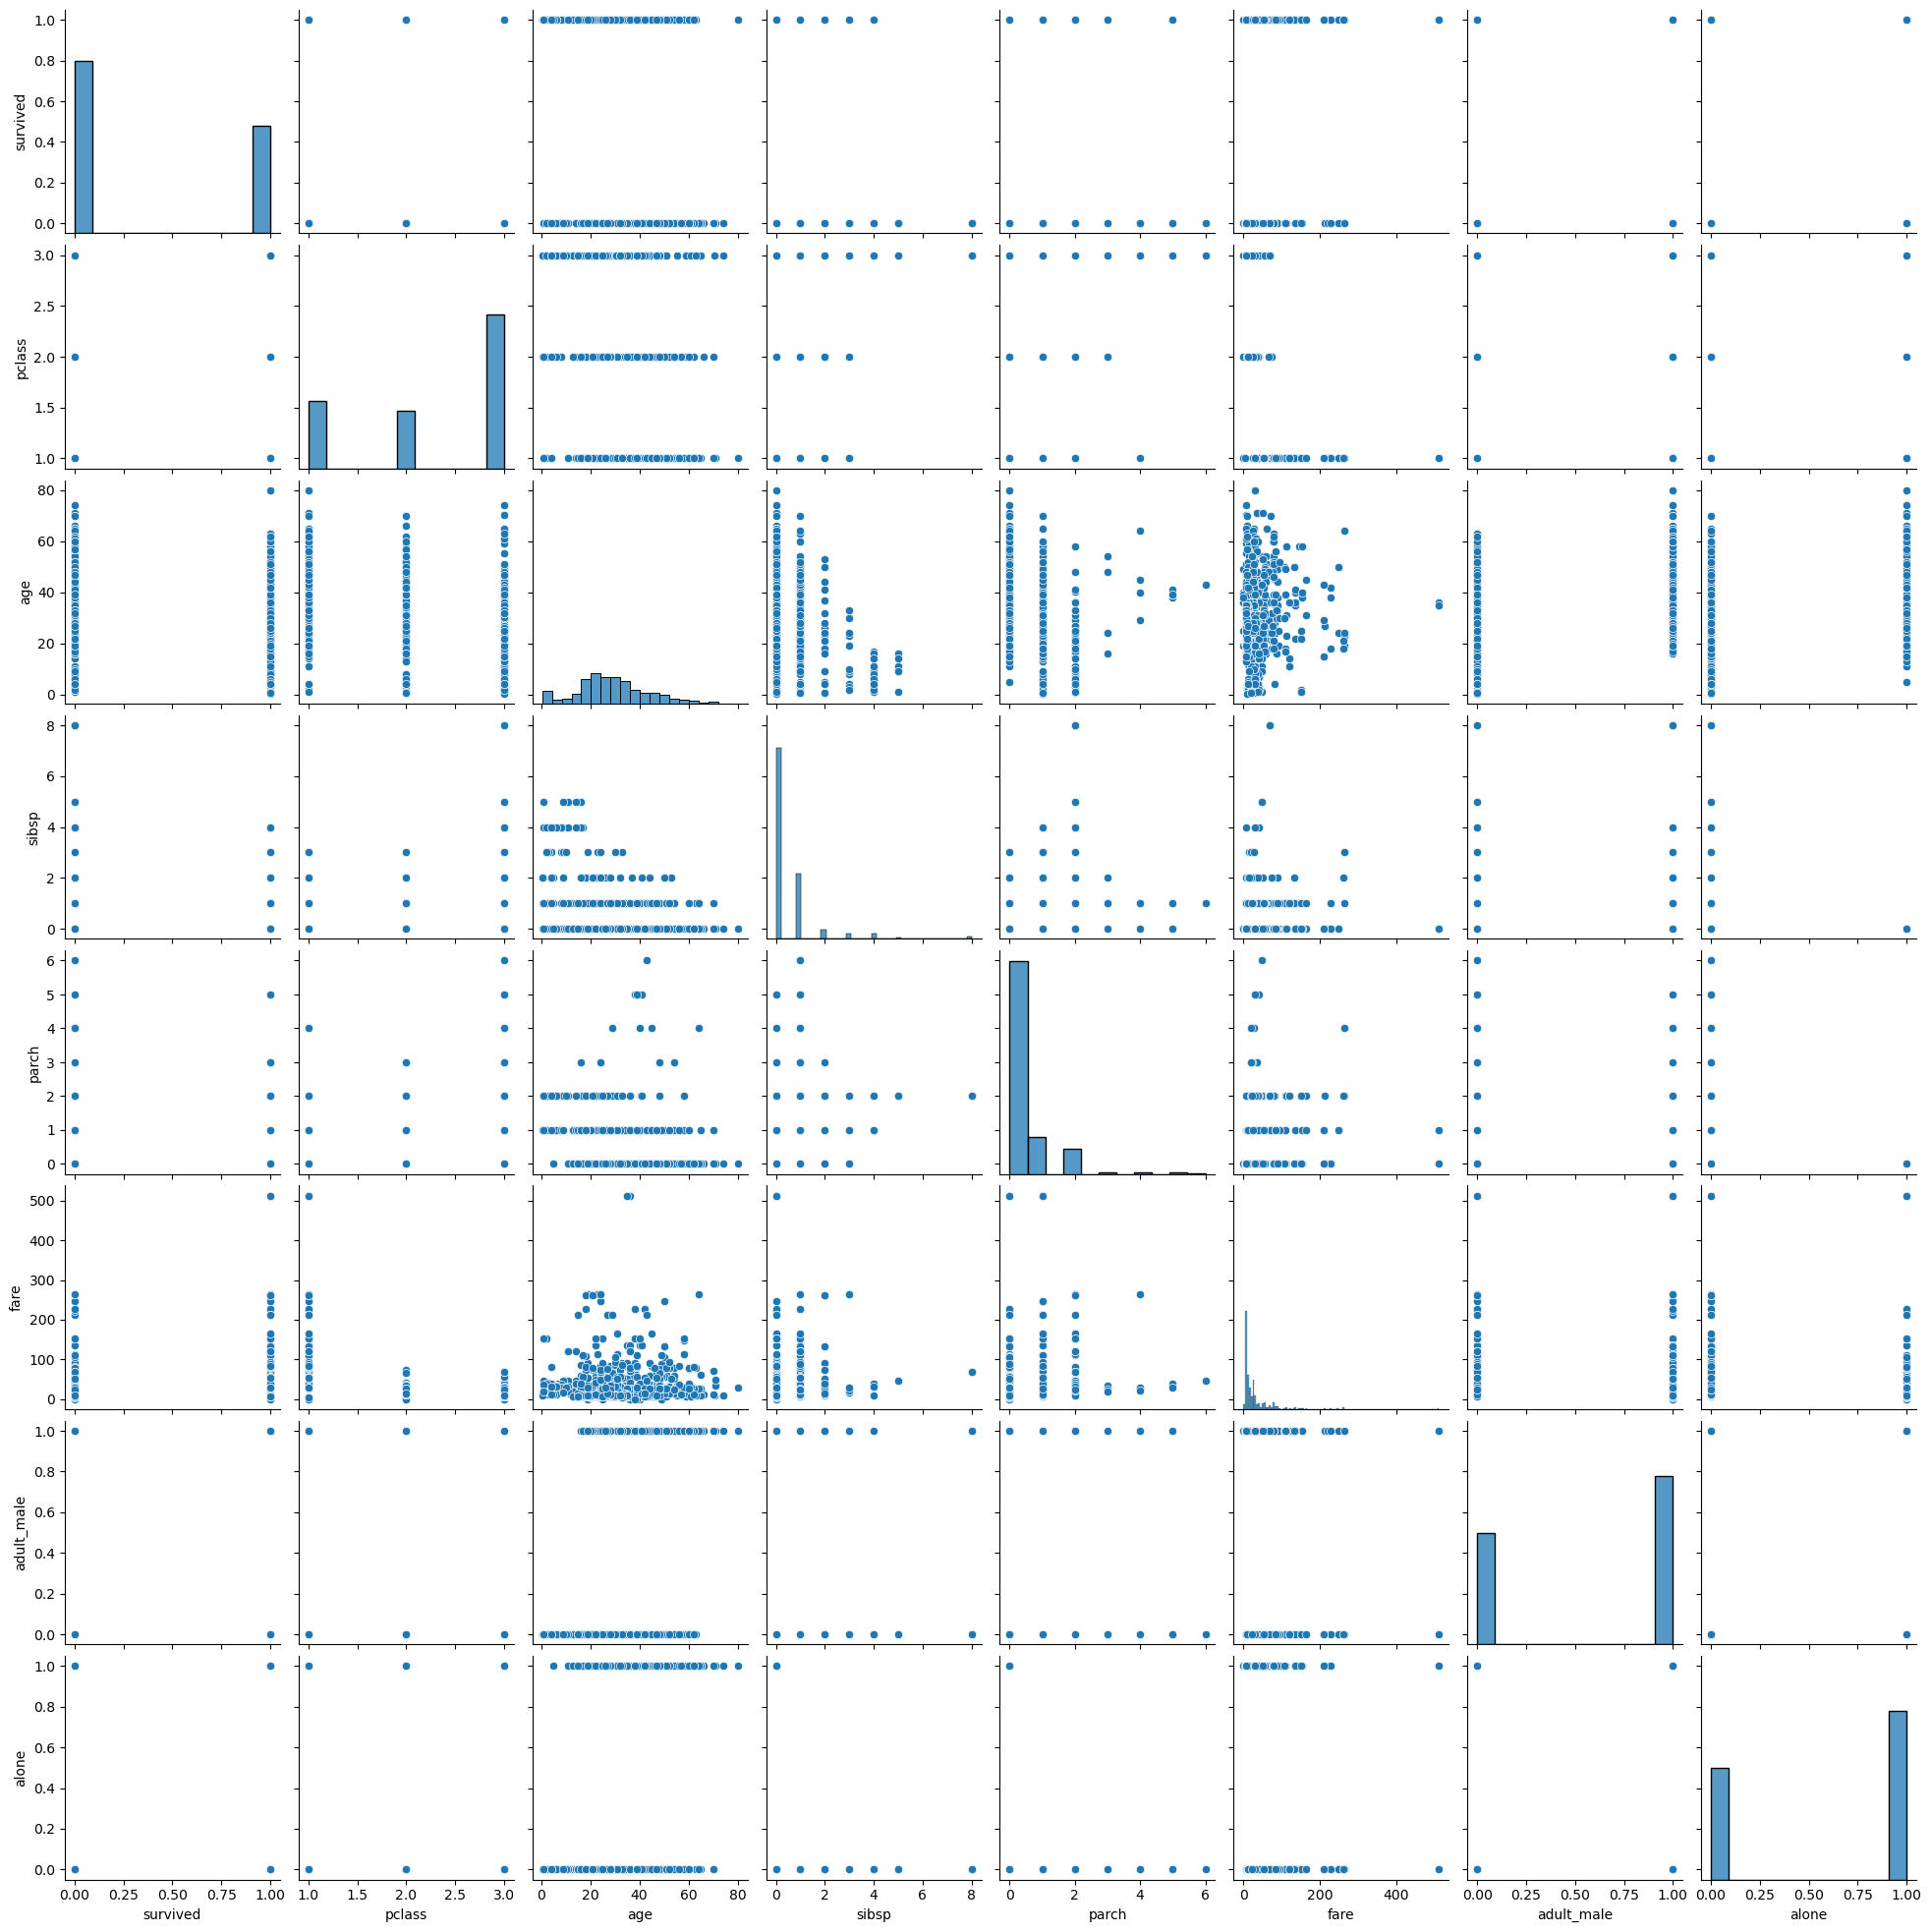

In [165]:
sns.pairplot(titanic)


# Bivariate Analysis

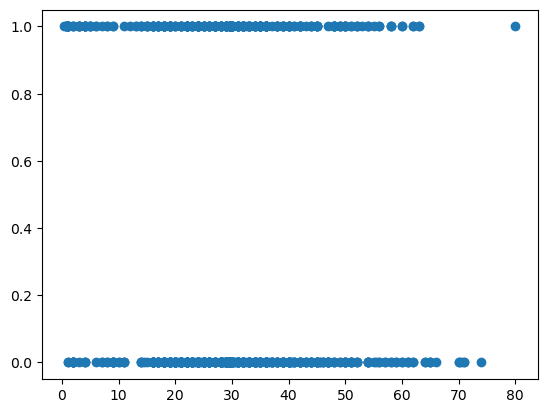

In [208]:
plt.scatter(titanic['Age'],titanic['Survived'])
plt.show()

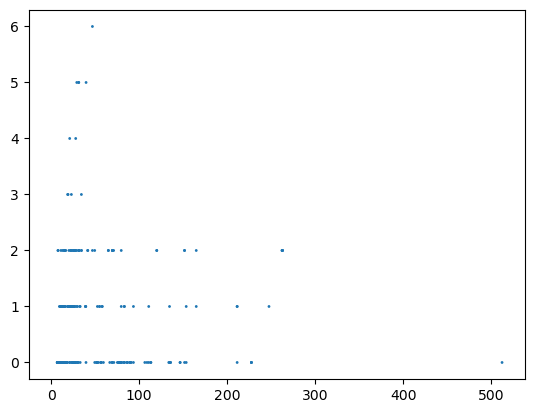

In [210]:
plt.scatter(titanic['Fare'],titanic['Parch'],titanic['Sex'])
plt.show()

# Pair Plot

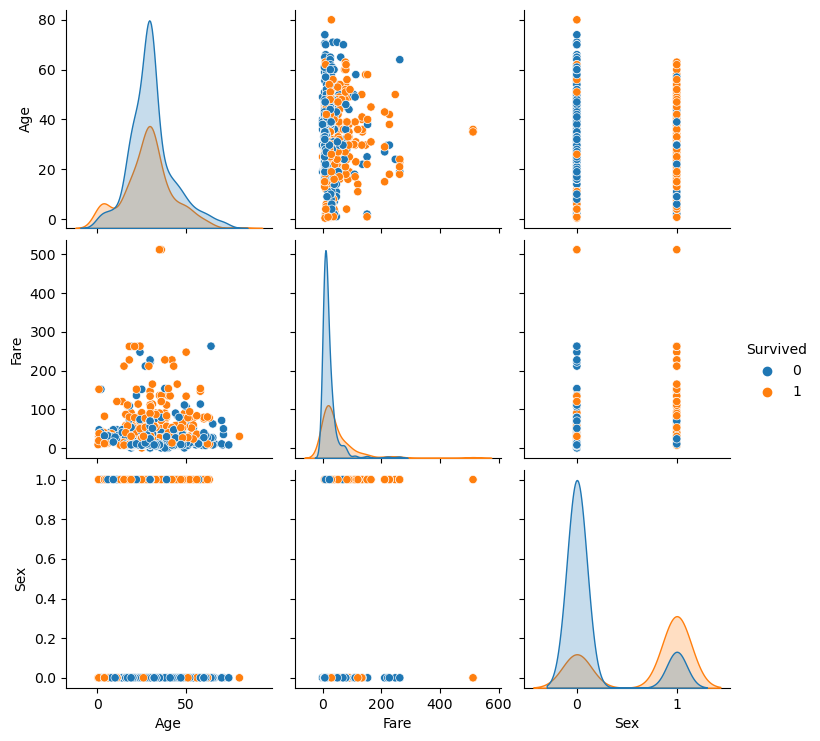

In [212]:
sns.pairplot(data=titanic,hue='Survived',vars=['Age','Fare','Sex'])

# Training the Model

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [87]:
X_train.shape

(623, 7)

In [88]:
Y_train.shape

(623,)

In [89]:
X_test.shape

(268, 7)

In [90]:
Y_test.shape

(268,)

In [91]:
#logistic regression
lg=LogisticRegression()

In [92]:
#training the model
lg.fit(X_train,Y_train)

LogisticRegression()

In [93]:
#testing the model
pred=lg.predict(X_test)

In [94]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [95]:
accuracy_score(Y_test,pred)

0.8059701492537313

In [96]:
print(confusion_matrix(Y_test,pred))

[[136  21]
 [ 31  80]]


<Axes: >

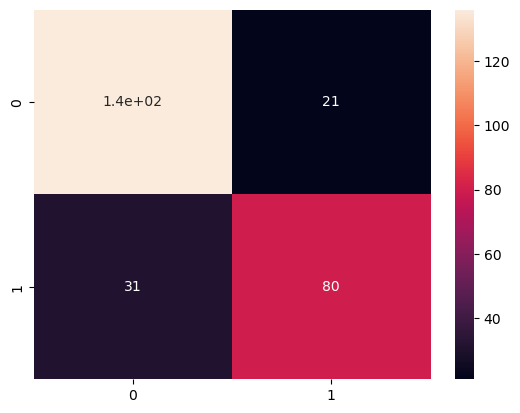

In [97]:
c=confusion_matrix(Y_test,pred)
sns.heatmap(c,annot=True)

# Testing the model

In [174]:
def titanicpred(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    print('predicted value:',pred)
    if pred==1:
        print('Yes Survived')
    else:
        print('Not Survived')

In [175]:
p=np.array([3,0,35.0,0,0,8.0500,0])
titanicpred(p)

predicted value: [0]
Not Survived


In [177]:

#applying machine learning models collectively
lg=LogisticRegression()
mnb=MultinomialNB()
gb=GaussianNB()
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

model=lg,mnb,gb,knn,svc,dtc,rfc

for m in model:
    
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    
    print('Accuracy score of ',m,' is:')
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression()  is:
0.8059701492537313
[[136  21]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



Accuracy score of  MultinomialNB()  is:
0.7089552238805971
[[137  20]
 [ 58  53]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       157
           1       0.73      0.48      0.58       111

    accuracy                           0.71       268
   macro avg       0.71      0.68      0.68       268
weighted avg       0.71      0.71      0.69       268



Accuracy score of  GaussianNB()  is:
0.7985074626865671
[[131  26]
 [ 28  83]]
              precision    recall  f1-score   support

           0       0.82      0.83      

In [ ]:
#logistic regression gives the most appropriate method to calculate the number of survivals in the ship.